## Libraries

In [1]:
# Determinadas.
import numpy as np
import pandas
import matplotlib.pyplot as plt
import random

# Modelos.
from sklearn.svm import SVC

# Training and testing sets.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# Procesamiento de imágenes.
import numpy as np
import cv2
import os
from numpy import mean

# Metrics.
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

# Control de modelos.
from joblib import dump, load

## Load datasets

In [2]:
# Leer dataset de letras.
# lettersDF = pandas.read_csv("Letters and numbers datasets/SimpleDatasets/SimpleLettersDataset.csv")
lettersDF = pandas.read_csv("Letters and numbers datasets/ComplexDatasets/ComplexLettersDataset.csv")

# Leer dataset de números.
# numbersDF = pandas.read_csv("Letters and numbers datasets/SimpleDatasets/SimpleNumbersDataset.csv")
numbersDF = pandas.read_csv("Letters and numbers datasets/ComplexDatasets/ComplexNumbersDataset.csv")

## Show datasets

### Letters Dataset

In [3]:
# Mostrar dataset.
lettersDF

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,255,...,255,0,0,0,0,0,0,0,0,77
1,1,0,0,0,0,0,255,255,255,255,...,0,0,0,0,0,0,0,0,0,81
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,66
3,3,0,0,0,0,0,0,0,0,255,...,255,0,0,0,0,0,0,0,0,66
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26409,26409,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,89
26410,26410,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,71
26411,26411,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,79
26412,26412,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,86


### Numbers Dataset

In [4]:
# Mostrar dataset.
numbersDF

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,255,255,0,...,255,255,0,0,0,0,0,0,0,3
1,1,0,0,0,0,0,0,0,255,255,...,255,255,255,255,255,255,255,255,255,2
2,2,0,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,7
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,4,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10155,10155,0,0,0,0,0,0,0,0,0,...,255,255,255,0,0,0,0,0,0,1
10156,10156,0,0,0,0,0,0,0,0,255,...,255,0,0,0,0,0,0,0,0,9
10157,10157,0,0,0,0,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,2
10158,10158,0,0,0,0,0,0,255,255,255,...,255,255,0,0,0,0,0,0,0,8


## Segment on 'X' and 'Y'

In [5]:
# Segmentar el dataset de letras.
X_letters = lettersDF.loc[:, '0':'783']
Y_letters = lettersDF.loc[:,'784']

# Obtener los valores.
X_letters = X_letters.values
Y_letters = Y_letters.values


# Segmentar el dataset de números.
X_numbers = numbersDF.loc[:, '0':'783']
Y_numbers = numbersDF.loc[:,'784']

# Obtener los valores.
X_numbers = X_numbers.values
Y_numbers = Y_numbers.values

## Letters model

In [6]:
# Dividir arreglos.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_letters, Y_letters, test_size=0.15, random_state=0)

# Creación del modelo (máquina de soporte vectorial).
letters_model = SVC(probability=True)

# Entrenamiento.
letters_model.fit(Xtrain, Ytrain)

# Predecir datos de prueba.
Ypred = letters_model.predict(Xtest)

### Letters model statistical metrics

MAE: 0.7284885187988898
MSE: 8.886954327529649
R2 score: 0.8440994267443684
Accuracy: 0.9086550592985112


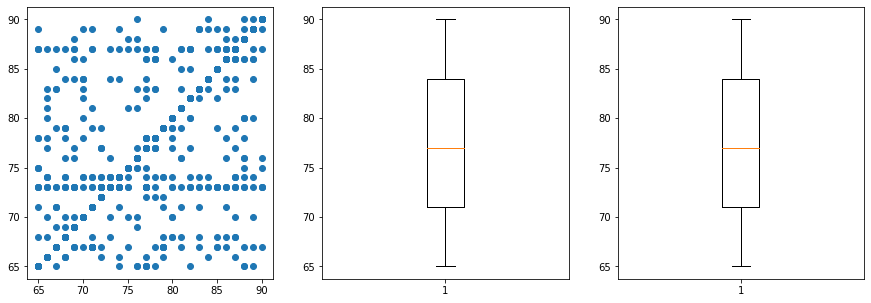

In [7]:
# Imprimir variables de estadística para diagnosticar el modelo.
print('MAE:', mean_absolute_error(Ytest, Ypred))
print('MSE:', mean_squared_error(Ytest, Ypred))
print('R2 score:', r2_score(Ytest, Ypred))
print('Accuracy:', accuracy_score(Ytest,Ypred))

# Graficación de scatter.
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter( Ytest, Ypred )

# Graficación de un boxplot de las 'Y' de prueba.
plt.subplot(1,3,2)
plt.boxplot(Ytest)

# Graficación de un boxplot de las 'Y' que se predijeron.
plt.subplot(1,3,3)
plt.boxplot(Ypred)

# Mostrar gráficas.
plt.show()

### Confusion matrix

In [8]:
# Crear matriz de confusión.
m_letters = confusion_matrix(Ytest,Ypred)

# Convertirla a un dataframe.
m_letters_df = pandas.DataFrame(m_letters)

# Mostrar dataframe.
m_letters_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,140,0,0,1,0,0,1,0,4,0,...,0,0,0,0,0,0,3,0,1,0
1,0,169,0,1,0,1,0,0,3,3,...,1,1,1,0,0,0,1,0,0,0
2,1,0,135,0,1,0,3,0,2,0,...,0,0,2,0,1,0,1,0,0,0
3,0,3,0,166,1,1,0,0,3,2,...,0,0,0,1,0,0,1,0,0,0
4,0,0,3,0,120,1,0,0,5,0,...,0,0,0,1,0,1,2,1,0,0
5,0,0,1,0,0,123,0,0,1,2,...,0,1,1,3,0,1,0,0,1,0
6,0,0,9,1,0,0,132,0,2,2,...,1,0,0,0,0,0,2,0,1,0
7,0,1,1,0,0,0,0,131,8,2,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,1,0,0,145,4,...,0,0,0,1,0,0,1,0,0,0
9,1,1,0,0,0,0,1,0,6,146,...,0,0,0,1,0,0,1,0,1,0


### Export letters model

In [9]:
dump(letters_model, 'Models/SVC Models/Complex_Letters_SVC_Model.joblib') 

['Models/SVC Models/Complex_Letters_SVC_Model.joblib']

## Numbers model

In [10]:
# Dividir arreglos.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_numbers, Y_numbers, test_size=0.15, random_state=0)

# Creación del modelo (máquina de soporte vectorial).
numbers_model = SVC(probability=True)

# Entrenamiento.
numbers_model.fit(Xtrain, Ytrain)

# Predecir datos de prueba.
Ypred = numbers_model.predict(Xtest)

### Numbers model statistical metrics

MAE: 0.20275590551181102
MSE: 1.0688976377952757
R2 score: 0.8726257746824002
Accuracy: 0.949475065616798


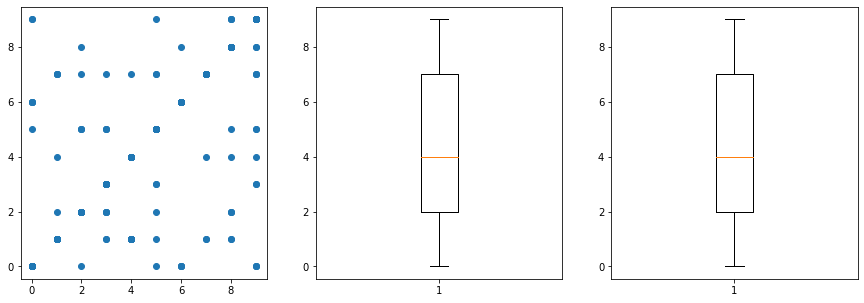

In [11]:
# Imprimir variables de estadística para diagnosticar el modelo.
print('MAE:', mean_absolute_error(Ytest, Ypred))
print('MSE:', mean_squared_error(Ytest, Ypred))
print('R2 score:', r2_score(Ytest, Ypred))
print('Accuracy:', accuracy_score(Ytest,Ypred))

# Graficación de scatter.
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter( Ytest, Ypred )

# Graficación de un boxplot de las 'Y' de prueba.
plt.subplot(1,3,2)
plt.boxplot(Ytest)

# Graficación de un boxplot de las 'Y' que se predijeron.
plt.subplot(1,3,3)
plt.boxplot(Ypred)

# Mostrar gráficas.
plt.show()

### Confusion matrix

In [12]:
# Crear matriz de confusión.
m_numbers = confusion_matrix(Ytest,Ypred)

# Convertirla a un dataframe.
m_numbers_df = pandas.DataFrame(m_numbers)

# Mostrar dataframe.
m_numbers_df

,0,1,2,3,4,5,6,7,8,9
0,151,0,0,0,0,1,4,0,0,2
1,0,158,1,0,1,0,0,4,0,0
2,1,0,150,0,0,3,0,1,1,0
3,0,2,4,115,0,3,0,1,0,0
4,0,8,0,0,153,0,0,1,0,0
5,1,1,1,2,0,157,0,2,0,1
6,4,0,0,0,0,0,136,0,1,0
7,0,2,0,0,1,0,0,146,0,0
8,0,2,3,0,1,1,0,0,135,3
9,3,0,0,2,1,2,0,3,2,146


### Export numbers model

In [13]:
dump(numbers_model, 'Models/SVC Models/Complex_Numbers_SVC_Model.joblib') 

['Models/SVC Models/Complex_Numbers_SVC_Model.joblib']